#### Sử dụng DeepFace để nhận diện khuôn mặt
pip install deepface

In [1]:
# pip install deepface
# pip install tf-keras

In [1]:
from deepface import DeepFace
import matplotlib.pyplot as plt
import pandas as pd
import os

In [61]:
test_01 = "test/dataset/nam.png"
test_02 = "test/dataset/tai.png"
test_03 = "test/dataset/truong.png"

- VGG face là model mặc định của DeepFace
- Ensemble learning: sử dụng 10 model khác nhau để dự đoán kết quả, cho ra kết quả tốt nhất nhưng tốn nhiều thời gian hơn

In [4]:
model_name = "Facenet"

In [5]:
DeepFace.verify(
    img1_path=test_01, img2_path=test_02, model_name=model_name, threshold=0.2
)

{'verified': False,
 'distance': 0.6037077066427117,
 'threshold': 0.2,
 'model': 'Facenet',
 'detector_backend': 'opencv',
 'similarity_metric': 'cosine',
 'facial_areas': {'img1': {'x': 104,
   'y': 57,
   'w': 98,
   'h': 98,
   'left_eye': None,
   'right_eye': None},
  'img2': {'x': 273,
   'y': 460,
   'w': 580,
   'h': 580,
   'left_eye': (656, 653),
   'right_eye': (437, 664)}},
 'time': 5.86}

#### Thử detect khuôn mặt

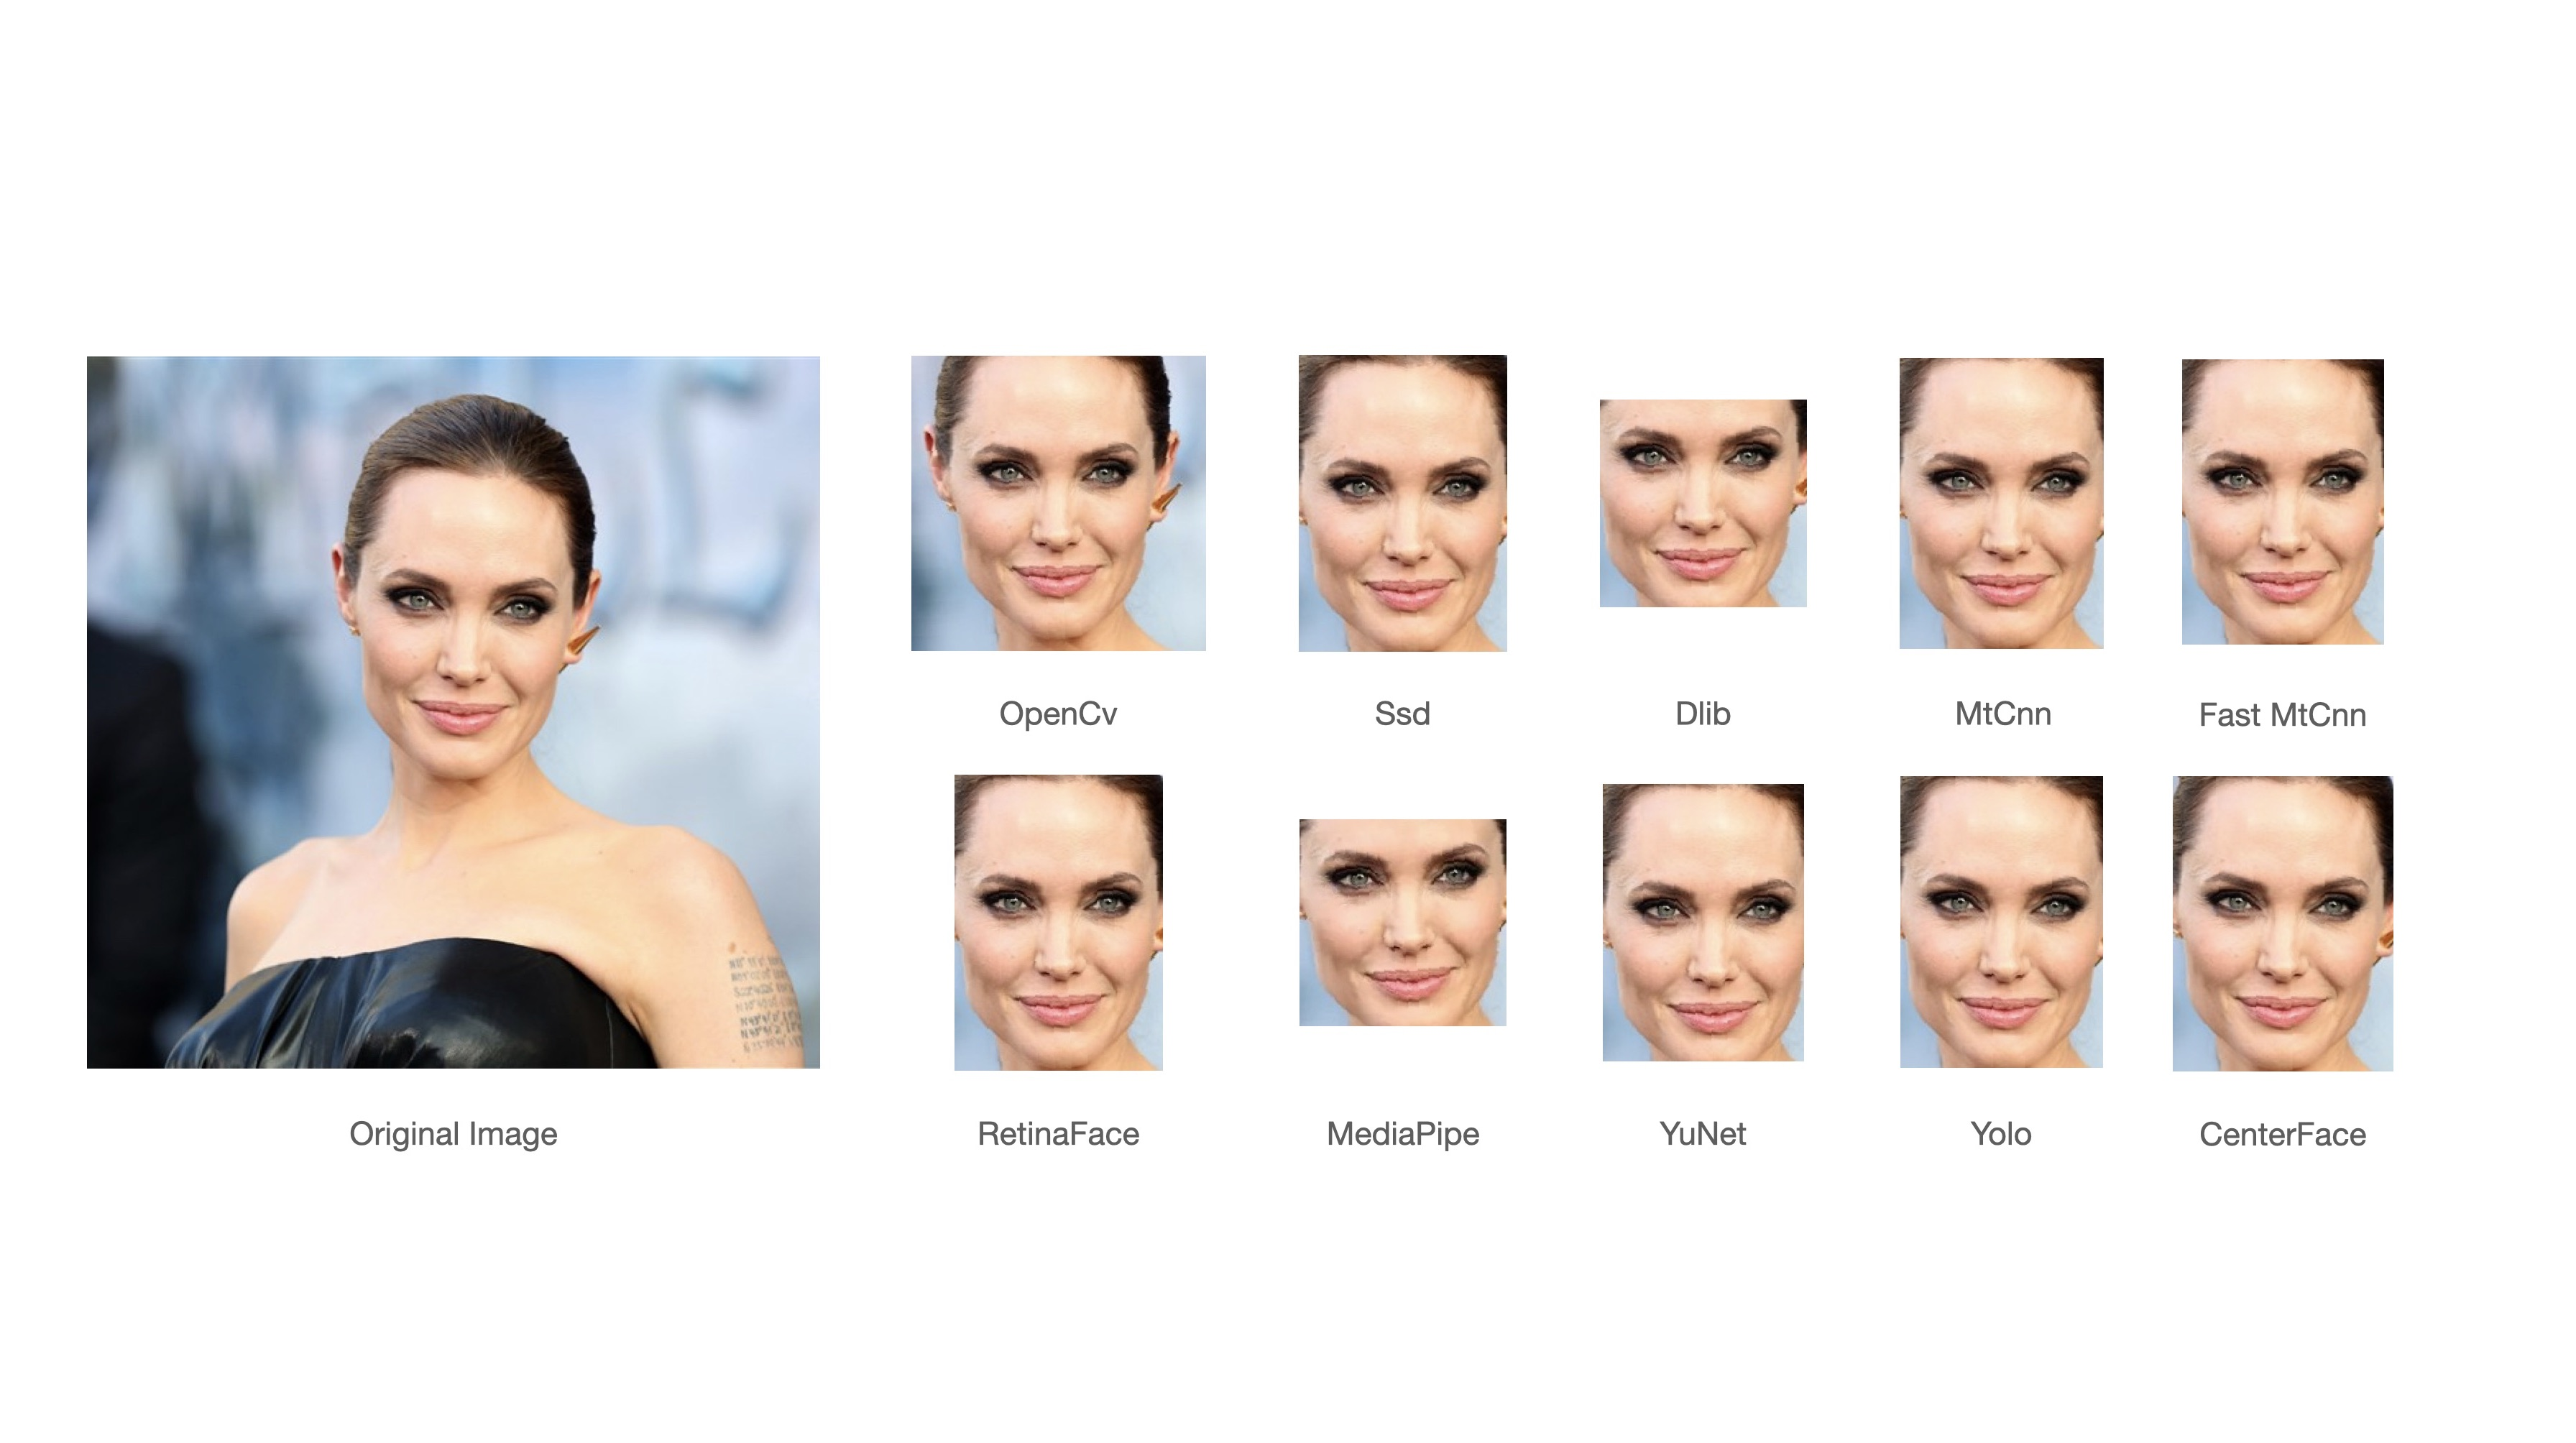

1/1 [==============================] - 0s 471ms/step


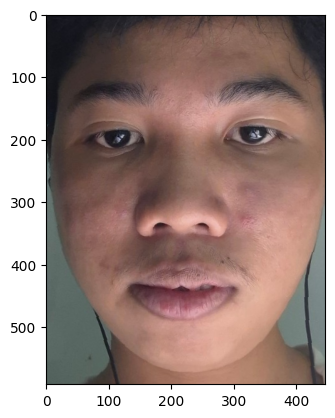

In [6]:
img1 = DeepFace.extract_faces(test_02, detector_backend="mtcnn")
plt.imshow(img1[0]["face"]);

### Tìm trong 1 thư mục ảnh

In [7]:
DeepFace.verify(img1_path=test_01, img2_path=test_02, model_name=model_name, distance_metric="euclidean_l2")

{'verified': False,
 'distance': 1.0988245598299227,
 'threshold': 0.8,
 'model': 'Facenet',
 'detector_backend': 'opencv',
 'similarity_metric': 'euclidean_l2',
 'facial_areas': {'img1': {'x': 104,
   'y': 57,
   'w': 98,
   'h': 98,
   'left_eye': None,
   'right_eye': None},
  'img2': {'x': 273,
   'y': 460,
   'w': 580,
   'h': 580,
   'left_eye': (656, 653),
   'right_eye': (437, 664)}},
 'time': 0.68}

Khi bạn gọi DeepFace.find lần sau, DeepFace sẽ tự động sử dụng file .pkl nếu nó tồn tại để tránh tái tính toán các vector đặc trưng.

In [8]:
# Tính thời gian chạy
df = DeepFace.find(img_path=test_02, db_path="dataset/tai", model_name=model_name, distance_metric="euclidean_l2")
df[0]

24-05-29 21:42:30 - Found 0 newly added image(s), 1 removed image(s), 0 replaced image(s).
24-05-29 21:42:30 - There are now 3 representations in ds_model_facenet_detector_opencv_aligned_normalization_base_expand_0.pkl
24-05-29 21:42:30 - Searching test/dataset/tai.png in 3 length datastore
24-05-29 21:42:31 - find function duration 0.4111442565917969 seconds


identity                                      hash  target_x  \
0  dataset/tai\tai_02.png  21ec3c9f94698d8d83419a6c2a0977445844554f        60   
1  dataset/tai\tai_03.png  4c47e188587b89e2d40feaf7d2046abde85b7ec6       114   

   target_y  target_w  target_h  source_x  source_y  source_w  source_h  \
0        20        66        66       273       460       580       580   
1        20        67        67       273       460       580       580   

   threshold  distance  
0        0.8  0.750249  
1        0.8  0.788215

#### Testing

#### Lựa chọn threshold phù hợp

In [33]:
test_folder = "test/dataset"
for img in os.listdir(test_folder):
    for db_img in os.listdir("dataset/tai"):
        if ".pkl" in db_img:
            continue

        test_img = f"{test_folder}/{img}"
        result = DeepFace.verify(
            f"{test_folder}/{img}",
            f"dataset/tai/{db_img}",
            model_name=model_name,
            distance_metric="euclidean_l2",
            threshold=0.75,
        )

        print(
            f"Test: {img}",
            f"vs {db_img}",
            result["verified"],
            result["distance"],
        )

        print("=====================================")

Test: nam.png vs tai_01.png False 1.0988245598299227
Test: nam.png vs tai_02.png False 1.1663622373005227
Test: nam.png vs tai_03.png False 1.1726527537580815
Test: nam.png vs tai_04.png False 1.145803037524175
Test: tai.png vs tai_01.png True 0.0
Test: tai.png vs tai_02.png True 0.38034601550392677
Test: tai.png vs tai_03.png True 0.419796331665134
Test: tai.png vs tai_04.png True 0.3717564510532191
Test: tai_02.png vs tai_01.png True 0.736096823271313
Test: tai_02.png vs tai_02.png False 0.7615162780914428
Test: tai_02.png vs tai_03.png False 0.7815547344453887
Test: tai_02.png vs tai_04.png False 0.7539273685651715
Test: truong.png vs tai_01.png False 1.1574968007773758
Test: truong.png vs tai_02.png False 1.1763883780178839
Test: truong.png vs tai_03.png False 1.175975558796679
Test: truong.png vs tai_04.png False 1.181892329024631
Test: truong02.png vs tai_01.png False 1.032553817231372
Test: truong02.png vs tai_02.png False 0.999679183861071
Test: truong02.png vs tai_03.png False

In [7]:
def verify_image(img_path, db_path):
    if "dataset" not in db_path:
        db_path = "dataset/" + db_path

    if not os.path.exists(db_path):
        return False
    
    result = DeepFace.find(img_path=img_path, db_path=db_path, model_name=model_name, distance_metric="euclidean_l2")
    if result[0].shape[0] == 0:
        return False
    return True    

In [8]:
# Load danh sách test
test_folder = "test/dataset"
for img in os.listdir(test_folder):
    is_verified = "verified" if verify_image(f"{test_folder}/{img}", db_path="tai1") else "unverified"
    print(f"Kết quả so sánh ảnh {img}: {is_verified}")

Kết quả so sánh ảnh nam.png: unverified
Kết quả so sánh ảnh tai.png: unverified
Kết quả so sánh ảnh tai_02.png: unverified
Kết quả so sánh ảnh truong.png: unverified
Kết quả so sánh ảnh truong02.png: unverified
Kết quả so sánh ảnh tuan.png: unverified


#### Phân tích khuôn mặt có đang cười

In [4]:
tai_01 = "dataset/tai/tai_01.png"
tai_02 = "dataset/tai/tai_02.png"
tai_03 = "dataset/tai/tai_03.png"
tai_04 = "dataset/tai/tai_04.png"
tai_2022 = "test/dataset/tai_2022.png"

In [65]:
DeepFace.verify(img1_path=tai_01, img2_path=tai_2022, model_name=model_name, distance_metric="euclidean_l2")

{'verified': False,
 'distance': 0.8404159407687227,
 'threshold': 0.8,
 'model': 'Facenet',
 'detector_backend': 'opencv',
 'similarity_metric': 'euclidean_l2',
 'facial_areas': {'img1': {'x': 273,
   'y': 460,
   'w': 580,
   'h': 580,
   'left_eye': (656, 653),
   'right_eye': (437, 664)},
  'img2': {'x': 59,
   'y': 32,
   'w': 78,
   'h': 78,
   'left_eye': None,
   'right_eye': None}},
 'time': 0.68}

In [2]:
DeepFace.build_model("Emotion")

In [9]:
result = DeepFace.analyze(tai_02, actions=["emotion"])[0]
result["emotion"]["happy"] >= 0.4

True

In [ ]:
#### Thử nghiệm với 